Exemplo do Dataset:
                                           avaliacao sentimento
0  Produto excelente, adorei a qualidade e o preço.   Positivo
1                     Muito bom! Recomendo a todos.   Positivo
2       Entrega rápida e produto conforme esperado.   Positivo
3       Serviço horrível, estou muito insatisfeito.   Negativo
4                 Péssimo, não compraria novamente.   Negativo

Número total de avaliações: 18
Distribuição das classes:
 sentimento
Positivo    6
Negativo    6
Neutro      6
Name: count, dtype: int64

--- Dados Após Divisão ---
Número de amostras de treino: 12
Número de amostras de teste: 6

--- Vetorização de Texto ---
Shape de X_train_vec (amostras, vocabulário): (12, 51)
Shape de X_test_vec (amostras, vocabulário): (6, 51)
Tamanho do vocabulário: 51 palavras únicas

--- Treinando o Modelo Multinomial Naive Bayes ---
Modelo treinado com sucesso!

--- Realizando Previsões ---
Classes Aprendidas pelo Modelo: ['Negativo' 'Neutro' 'Positivo']
Primeiras 5 pr

C:\Users\N5\miniconda3\envs\KNN-TEST\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\N5\miniconda3\envs\KNN-TEST\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\N5\miniconda3\envs\KNN-TEST\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


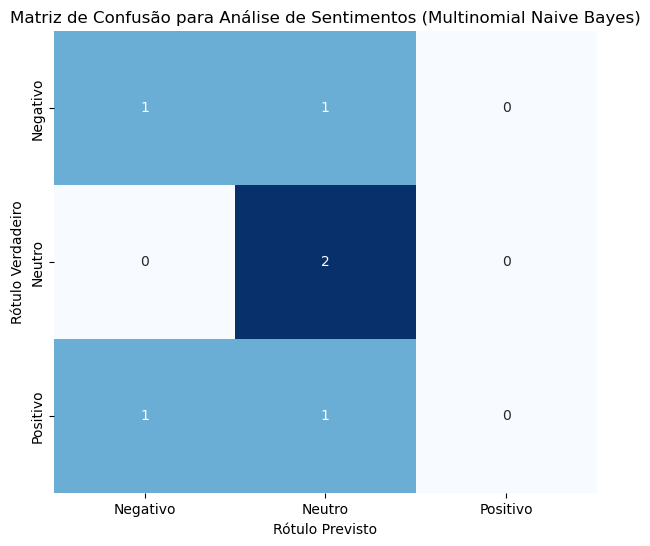

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer # Para converter texto em números
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Preparação dos Dados ---
# Criando um dataset sintético de avaliações e seus sentimentos.
# Em um cenário real, você carregaria isso de um CSV, banco de dados, etc.
data = {
    'avaliacao': [
        "Produto excelente, adorei a qualidade e o preço.", # Positivo
        "Muito bom! Recomendo a todos.", # Positivo
        "Entrega rápida e produto conforme esperado.", # Positivo
        "Serviço horrível, estou muito insatisfeito.", # Negativo
        "Péssimo, não compraria novamente.", # Negativo
        "Experiência terrível, desperdício de dinheiro.", # Negativo
        "Atendimento mediano, produto ok.", # Neutro
        "Chegou no prazo, mas não é o que eu esperava.", # Neutro
        "Funciona, mas com algumas ressalvas.", # Neutro
        "Amei! Perfeito para minhas necessidades.", # Positivo
        "Totalmente decepcionado com a compra.", # Negativo
        "É um produto comum, nada de especial.", # Neutro
        "Superou minhas expectativas, parabéns!", # Positivo
        "Nunca mais compro nesta loja.", # Negativo
        "Recebi, testei e funciona.", # Neutro
        "Fantástico, voltarei a comprar.", # Positivo
        "Que decepção, dinheiro jogado fora.", # Negativo
        "Considero um bom custo-benefício, apesar de pequenos detalhes." # Neutro
    ],
    'sentimento': [
        'Positivo', 'Positivo', 'Positivo',
        'Negativo', 'Negativo', 'Negativo',
        'Neutro', 'Neutro', 'Neutro',
        'Positivo', 'Negativo', 'Neutro',
        'Positivo', 'Negativo', 'Neutro',
        'Positivo', 'Negativo', 'Neutro'
    ]
}

df = pd.DataFrame(data)

print("Exemplo do Dataset:\n", df.head())
print(f"\nNúmero total de avaliações: {len(df)}")
print("Distribuição das classes:\n", df['sentimento'].value_counts())

# Separando as características (X = texto da avaliação) e o rótulo (y = sentimento)
X = df['avaliacao']
y = df['sentimento']

# Dividindo os dados em conjuntos de treino e teste.
# test_size=0.3 significa 30% para teste, 70% para treino.
# random_state=42 para reprodutibilidade.
# stratify=y para garantir que a proporção das classes (Positivo/Negativo/Neutro)
# seja mantida em ambos os conjuntos. Isso é crucial para datasets pequenos ou desbalanceados.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\n--- Dados Após Divisão ---")
print(f"Número de amostras de treino: {len(X_train)}")
print(f"Número de amostras de teste: {len(X_test)}")

# --- 1.1. Pré-processamento de Texto: Vetorização ---
# O Naive Bayes (e a maioria dos algoritmos de ML) não pode trabalhar diretamente com texto.
# Precisamos converter o texto em uma representação numérica.
# O CountVectorizer faz isso criando uma "bag-of-words" (saco de palavras) para cada avaliação.
# Cada coluna representará uma palavra única do vocabulário e o valor será a sua contagem.

# Inicializando o vetorizador.
# stop_words='english' remove palavras comuns que não agregam muito significado (e.g., 'a', 'o', 'de').
# min_df=1 significa que uma palavra precisa aparecer em pelo menos 1 documento para ser incluída.
# max_df=1.0 significa que uma palavra que aparece em todos os documentos não será removida.
vectorizer = CountVectorizer(stop_words=None, min_df=1, max_df=1.0)

# Aprendendo o vocabulário a partir dos dados de treino e transformando o texto em vetores de contagem.
# O 'fit' constrói o vocabulário, e o 'transform' converte o texto usando esse vocabulário.
X_train_vec = vectorizer.fit_transform(X_train)

# Transformando os dados de teste usando o MESMO vocabulário aprendido no treino.
# É importante usar o vocabulário do treino para evitar vazamento de dados.
X_test_vec = vectorizer.transform(X_test)

print("\n--- Vetorização de Texto ---")
print(f"Shape de X_train_vec (amostras, vocabulário): {X_train_vec.shape}")
print(f"Shape de X_test_vec (amostras, vocabulário): {X_test_vec.shape}")
print(f"Tamanho do vocabulário: {len(vectorizer.get_feature_names_out())} palavras únicas")
# print(f"Palavras no vocabulário (primeiras 10): {vectorizer.get_feature_names_out()[:10]}")


# 2. Treinamento do Modelo (Fase de Aprendizado)
# Usaremos o Multinomial Naive Bayes, ideal para dados de contagem (como contagens de palavras).

# Inicializando o classificador Multinomial Naive Bayes.
# alpha: Este é um parâmetro de suavização (Laplace smoothing).
# Ele adiciona um pequeno valor (alpha) a todas as contagens para evitar
# probabilidades zero para palavras que não foram vistas no conjunto de treinamento.
# Isso impede que a probabilidade a posteriori se torne zero, o que é crucial
# para evitar que palavras raras ou novas "quebrem" o modelo.
# Um valor de 1.0 (padrão) é chamado de suavização de Laplace.
mnb = MultinomialNB(alpha=1.0)

# Treinando o modelo com os vetores de contagem de palavras e os rótulos de sentimento.
# Neste passo, o MNB calcula as probabilidades de cada palavra aparecer em cada classe (Positivo, Negativo, Neutro).
print("\n--- Treinando o Modelo Multinomial Naive Bayes ---")
mnb.fit(X_train_vec, y_train)
print("Modelo treinado com sucesso!")

# 3. Classificação de Novos Dados (Fase de Predição)
# Agora, usamos o modelo treinado para prever os sentimentos das avaliações de teste.

print("\n--- Realizando Previsões ---")
# Previsões para as avaliações no conjunto de teste.
y_pred = mnb.predict(X_test_vec)

# Obtendo as probabilidades para cada classe (Positivo, Negativo, Neutro).
# A ordem das probabilidades corresponde à ordem das classes em mnb.classes_
y_proba = mnb.predict_proba(X_test_vec)

print("Classes Aprendidas pelo Modelo:", mnb.classes_)
print(f"Primeiras 5 previsões: {y_pred[:5]}")
print(f"Probabilidades das primeiras 5 previsões:\n {y_proba[:5].round(2)}") # Arredondando para 2 casas decimais

# Exemplo de uma nova avaliação para prever o sentimento
nova_avaliacao = ["O filme foi ótimo, mas o final não agradou muito."]
# Primeiro, vectorize a nova avaliação usando o mesmo vetorizador treinado.
nova_avaliacao_vec = vectorizer.transform(nova_avaliacao)
pred_nova = mnb.predict(nova_avaliacao_vec)
proba_nova = mnb.predict_proba(nova_avaliacao_vec)

print(f"\nPrevisão para a avaliação '{nova_avaliacao[0]}': {pred_nova[0]}")
# Encontrando o índice da classe prevista para exibir a probabilidade corretamente
idx_pred = list(mnb.classes_).index(pred_nova[0])
print(f"Probabilidade da previsão: {proba_nova[0, idx_pred]:.4f}")
print(f"Probabilidades completas: {dict(zip(mnb.classes_, proba_nova[0].round(4)))}")

# 4. Avaliação do Modelo
# Avaliando o desempenho do nosso classificador de sentimentos.

print("\n--- Avaliação do Modelo ---")

# Acurácia: Porcentagem de avaliações classificadas corretamente.
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.4f}")

# Relatório de Classificação: Métricas detalhadas por classe (Positivo, Negativo, Neutro).
# Precision, Recall, F1-Score.
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=mnb.classes_))

# Matriz de Confusão: Visualiza acertos e erros do modelo para cada classe.
# Linhas: Classes Reais
# Colunas: Classes Previstas
conf_matrix = confusion_matrix(y_test, y_pred, labels=mnb.classes_) # Especificar labels para ordem correta
print("\nMatriz de Confusão:")
print(conf_matrix)

# Visualizando a Matriz de Confusão
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=mnb.classes_,
            yticklabels=mnb.classes_)
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.title('Matriz de Confusão para Análise de Sentimentos (Multinomial Naive Bayes)')
plt.show()